<a href="https://colab.research.google.com/github/gabrielcn/Bike_Sharing/blob/main/cyclistic_bike_share_washington.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Compartilhamento de bicicletas em Washington - 2016 (Capitalbikeshare)***


In [1]:
import pandas as pd #Importa a biblioteca pandas para ler o arquivo
import seaborn as sns #Importa a biblioteca seaborn
import matplotlib.pyplot as plt #Importa a bilbioteca matplotlib
import csv 
from datetime import datetime #operações para analisar datas

In [2]:
df_was = pd.read_csv("Washington-2016-Summary.csv") #Atribui a uma variável 

In [3]:
df_was

,duration,month,hour,day_of_week,user_type
0,7.123117,3,22,Thursday,Subscriber
1,9.792517,3,22,Thursday,Subscriber
2,6.632983,3,22,Thursday,Subscriber
3,7.404700,3,22,Thursday,Subscriber
4,13.014583,3,22,Thursday,Subscriber
...,...,...,...,...,...
66321,15.421933,10,8,Saturday,Subscriber
66322,6.355217,10,5,Saturday,Subscriber
66323,17.632783,10,2,Saturday,Subscriber
66324,3.377233,10,0,Saturday,Subscriber


In [4]:
df_was.shape #Formato da tabela

(66326, 5)

In [5]:
df_was.columns = ["duracao" , "mes" , "hora" , "dia_semana", "tipo_usuario"] #renomear colunas [] lista (columns é um atributo do pandas)
df_was.head()

,duracao,mes,hora,dia_semana,tipo_usuario
0,7.123117,3,22,Thursday,Subscriber
1,9.792517,3,22,Thursday,Subscriber
2,6.632983,3,22,Thursday,Subscriber
3,7.404700,3,22,Thursday,Subscriber
4,13.014583,3,22,Thursday,Subscriber


In [6]:
df_was['mes'].unique() #Todos os valores que foram colocados na coluna mes

array([ 3,  2,  1,  4,  5,  6,  8,  7,  9, 12, 11, 10])

In [7]:
df_was['mes'].value_counts() #Quantas vezes em cada mes

7     7341
6     7320
8     7198
9     6878
10    6792
5     5768
4     5602
3     5571
11    5214
12    3354
2     2854
1     2434
Name: mes, dtype: int64

In [8]:
df_was['dia_semana'].value_counts() #Quantas vezes em cada dia

Wednesday    10103
Thursday      9984
Friday        9970
Tuesday       9748
Monday        9394
Saturday      8900
Sunday        8227
Name: dia_semana, dtype: int64

**Quantidade de viagens por dia no ano de 2016**

In [9]:
qtd_viagem_por_dia_was = df_was['dia_semana'].value_counts() #Quantas vezes em cada dia

In [10]:
qtd_viagem_por_dia_was #Washington

Wednesday    10103
Thursday      9984
Friday        9970
Tuesday       9748
Monday        9394
Saturday      8900
Sunday        8227
Name: dia_semana, dtype: int64

In [11]:
qtd_viagem_por_dia_was.to_frame()

,dia_semana
Wednesday,10103
Thursday,9984
Friday,9970
Tuesday,9748
Monday,9394
Saturday,8900
Sunday,8227


In [12]:
df_qtd_viagem_por_dia_was = qtd_viagem_por_dia_was.to_frame().reset_index()

In [13]:
df_qtd_viagem_por_dia_was #Quantidade total de viagens por dia em 2016

,index,dia_semana
0,Wednesday,10103
1,Thursday,9984
2,Friday,9970
3,Tuesday,9748
4,Monday,9394
5,Saturday,8900
6,Sunday,8227


In [14]:
df_qtd_viagem_por_dia_was.columns = ["dias", "total"]
df_qtd_viagem_por_dia_was

,dias,total
0,Wednesday,10103
1,Thursday,9984
2,Friday,9970
3,Tuesday,9748
4,Monday,9394
5,Saturday,8900
6,Sunday,8227


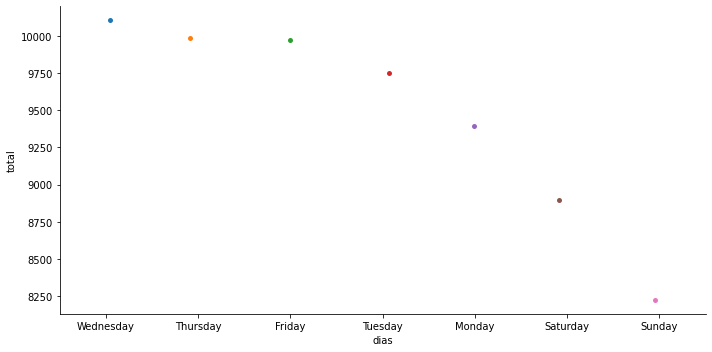

In [15]:
sns.catplot(x="dias", y="total", data = df_qtd_viagem_por_dia_was, aspect = 2)

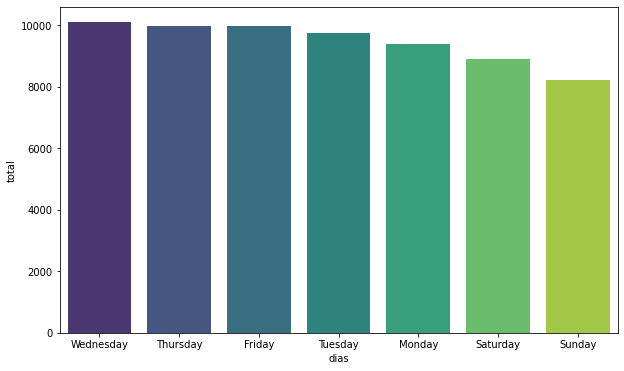

In [16]:
plt.figure(figsize=(10,6)) #Configura o tamanho da figura (10 para direita e 6 para baixo)
sns.barplot(x="dias", y="total", data = df_qtd_viagem_por_dia_was, palette = "viridis") #pallete, atributo que permite escolher um palete de cor, no caso é viridis

**Usuarios Inscritos e Usuarios "Visitantes"**

In [17]:
subscriber_was = df_was.loc[df_was.tipo_usuario=='Subscriber'].value_counts().sum()

In [18]:
subscriber_was

51753

In [19]:
customer_was = df_was.loc[df_was.tipo_usuario=='Customer'].value_counts().sum()

In [20]:
customer_was

14573

**Frequencia dos tipos de usuários em relação ao horário**

Quartis: Os quartis dividem os dados em quatro partes. Ordenando os dados cada quartil vai possuir 25% das observações. Ou seja, os primeiros 25% das observação estarão até o corte do 1º quartil, os próximos 25% até o corte do 2º quartil, etc.

Limites: O limite inferior é calculado sendo, geralmente, 1,5 vezes o corte do 1º quartil e o limite superior sendo 1,5 vezes o corte do 3º quartil.
O corte do segundo quartil é igual a mediana.

Outliers são observações atípicas, muito afastadas da maioria dos dados. Num boxplot esses valores ficam abaixo do limite inferior ou acima do limite superior.

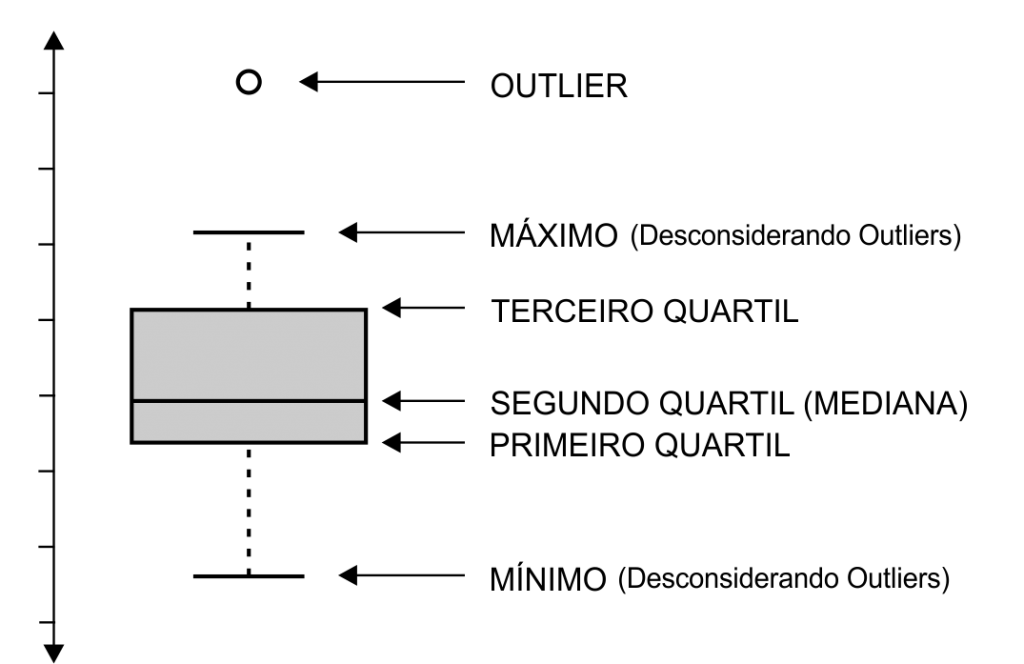

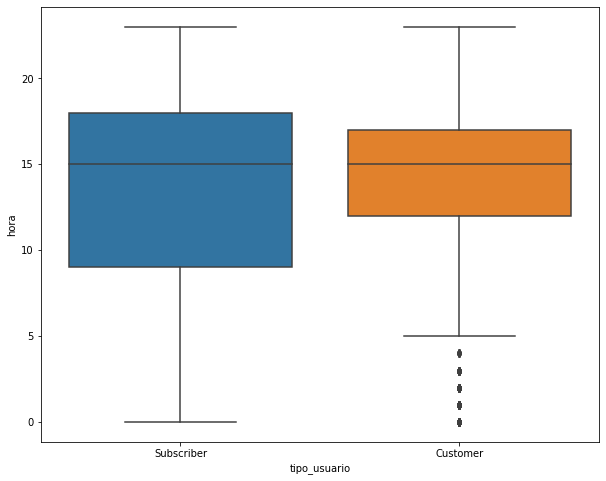

In [21]:
plt.figure(figsize=(10,8))
sns.boxplot(x="tipo_usuario", y="hora", data = df_was) 

In [22]:
df_was.groupby("tipo_usuario").median()["hora"] # Mediana

tipo_usuario
Customer      15.0
Subscriber    15.0
Name: hora, dtype: float64

**Explorando viagens por hora e por mes**

In [23]:
#Substitui valores da coluna por condição em pandas
df_was.loc[df_was.mes==1, "mes"]='jan'
df_was.loc[df_was.mes==2, "mes"]='fev'
df_was.loc[df_was.mes==3, "mes"]='mar'
df_was.loc[df_was.mes==4, "mes"]='abr'
df_was.loc[df_was.mes==5, "mes"]='mai'
df_was.loc[df_was.mes==6, "mes"]='jun'
df_was.loc[df_was.mes==7, "mes"]='jul'
df_was.loc[df_was.mes==8, "mes"]='ago'
df_was.loc[df_was.mes==9, "mes"]='set'
df_was.loc[df_was.mes==10, "mes"]='out'
df_was.loc[df_was.mes==11, "mes"]='nov'
df_was.loc[df_was.mes==12, "mes"]='dez'

In [24]:
df_was["mes"].value_counts() #Quantidade de viagens por mes em Chicago

jul    7341
jun    7320
ago    7198
set    6878
out    6792
mai    5768
abr    5602
mar    5571
nov    5214
dez    3354
fev    2854
jan    2434
Name: mes, dtype: int64

In [25]:
qtd_viagem_mes_was = df_was['mes'].value_counts()

In [26]:
qtd_viagem_mes_was = qtd_viagem_mes_was.to_frame().reset_index()

In [27]:
qtd_viagem_mes_was.columns = ["mes", "total"]
qtd_viagem_mes_was

,mes,total
0,jul,7341
1,jun,7320
2,ago,7198
3,set,6878
4,out,6792
5,mai,5768
6,abr,5602
7,mar,5571
8,nov,5214
9,dez,3354


**Análise geral por mes (todos os usuários, customer e subscriber)**

**Opção 1**

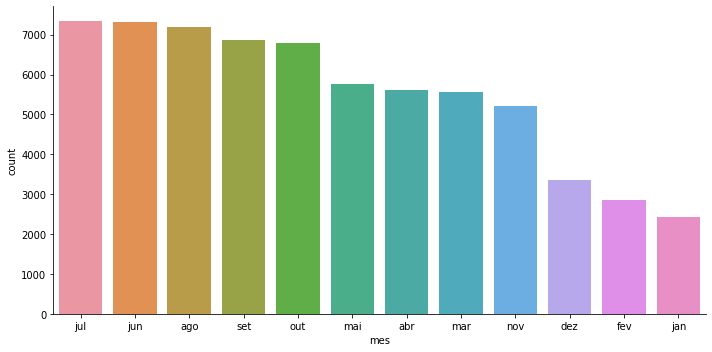

In [28]:
sns.catplot(x="mes", kind="count", data = df_was, aspect = 2, order = df_was['mes'].value_counts().index)
# usando alto nível, o sns.catplot vai plotar categoricamente as categorias de "mes", de maneira que conte (kind="count") quantas vezes aparece, e o data = df_chicago (está usando o DF df_chicago que importamos)
# aspect configura o tamanho da figura, colocando o 2 para trazer o dobro (retangulo) do quadrado.
# E o order define a ordem como é apresentado o gráfico, no caso é a ordem da série df_chicago['mes'].value_counts().index e o ".index" é o indice que está definida a ordem. index da série.

**Opção 2**

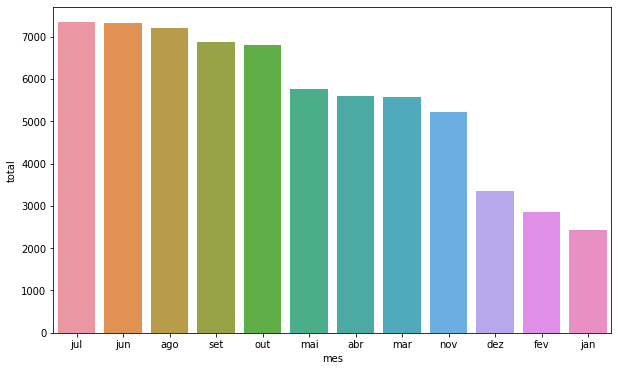

In [29]:
plt.figure(figsize=(10,6)) #Configura o tamanho da figura (10 para direita e 6 para baixo)
sns.barplot(x="mes", y="total", data = qtd_viagem_mes_was)

**Explorando por horário (todos os usuários)**

In [30]:
df_was['hora'].value_counts() #Quantidade de viagens no ano de 2016 por horário

17    7600
18    6111
8     5615
16    5104
19    4188
15    3829
7     3779
12    3667
13    3638
14    3620
9     3375
11    2984
20    2911
10    2608
21    2072
22    1459
6     1347
23     858
0      515
5      407
1      299
2      184
3       89
4       67
Name: hora, dtype: int64

In [31]:
qtd_viagem_hora_was = df_was['hora'].value_counts()

In [32]:
qtd_viagem_hora_was

17    7600
18    6111
8     5615
16    5104
19    4188
15    3829
7     3779
12    3667
13    3638
14    3620
9     3375
11    2984
20    2911
10    2608
21    2072
22    1459
6     1347
23     858
0      515
5      407
1      299
2      184
3       89
4       67
Name: hora, dtype: int64

In [33]:
qtd_viagem_hora_was = qtd_viagem_hora_was.to_frame().reset_index()

In [34]:
qtd_viagem_hora_was

,index,hora
0,17,7600
1,18,6111
2,8,5615
3,16,5104
4,19,4188
5,15,3829
6,7,3779
7,12,3667
8,13,3638
9,14,3620


In [35]:
qtd_viagem_hora_was.columns = ['hora', 'total']
qtd_viagem_hora_was

,hora,total
0,17,7600
1,18,6111
2,8,5615
3,16,5104
4,19,4188
5,15,3829
6,7,3779
7,12,3667
8,13,3638
9,14,3620


**Analise por hora de todos os usuários**

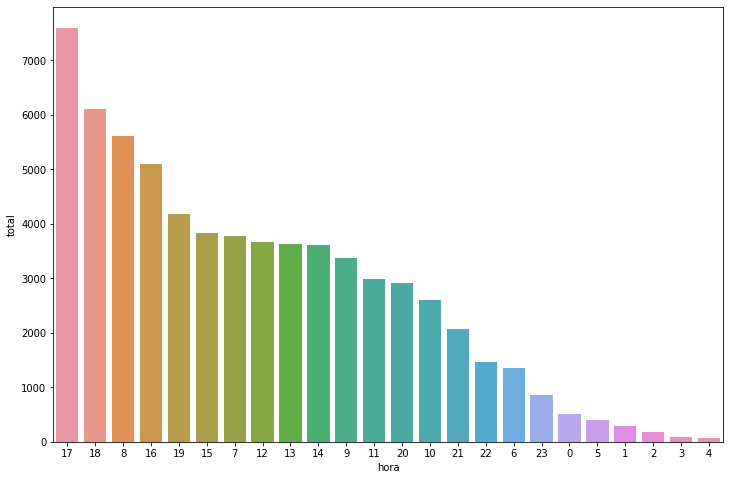

In [36]:
plt.figure(figsize=(12,8)) #Configura o tamanho da figura (12 para direita e 8 para baixo)
sns.barplot(x="hora", y="total", data = qtd_viagem_hora_was, order = df_was['hora'].value_counts().index)
# Quantidade total de viagens de todos os usuários por horário

**Quantidade ou frequencia de usuários por categoria (Subscriber e Customer)**

In [37]:
subscriber_was = df_was.loc[df_was.tipo_usuario=='Subscriber'].value_counts().sum()

In [38]:
subscriber_was

51753

In [39]:
customer_was = df_was.loc[df_was.tipo_usuario=='Customer'].value_counts().sum()

In [40]:
customer_was

14573

In [41]:
df_usuarios_was = {
    'tipo' : ['subscriber', 'customer'],
    'total' : [subscriber_was, customer_was]
    # {} dicionário do python
}

df_usuarios_was

{'tipo': ['subscriber', 'customer'], 'total': [51753, 14573]}

In [42]:
pd.DataFrame(df_usuarios_was) #Cria ou transforma em dataframe em cima de 'df_usuarios_chicago' que acabei de criar como dicionario

,tipo,total
0,subscriber,51753
1,customer,14573


In [43]:
 df_usuarios_was = pd.DataFrame(df_usuarios_was)
 df_usuarios_was

,tipo,total
0,subscriber,51753
1,customer,14573


**Analise de frequencia ou quantidades de usuarios**

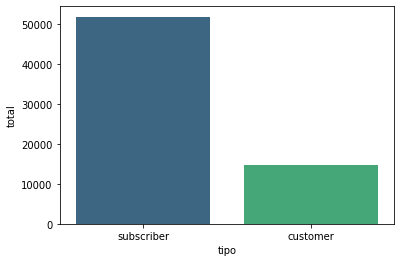

In [44]:
sns.barplot(x="tipo", y="total", data = df_usuarios_was, palette = "viridis") #Gráfico de barras com seaborn, definindo o "tipo" no eixo x e o "total" no eixo y, extraido do DF df_usuarios_chicago

**Mediana de viagem por tipo de usuário**

In [45]:
df_was.groupby("tipo_usuario").median()["duracao"] # Mediana

tipo_usuario
Customer      24.896717
Subscriber     9.733217
Name: duracao, dtype: float64

In [46]:
df_mediana_viagem_users_was = df_was.groupby("tipo_usuario").median()["duracao"].to_frame().reset_index()

In [47]:
df_mediana_viagem_users_was

,tipo_usuario,duracao
0,Customer,24.896717
1,Subscriber,9.733217


In [48]:
df_mediana_viagem_users_was.columns = ['users', 'duracao']

In [49]:
df_mediana_viagem_users_was.style.set_table_styles([{'selector' : '',
                            'props' : [('border',
                                        '2.5px solid black')]}])

,users,duracao
0,Customer,24.896717
1,Subscriber,9.733217


**Média de viagem por tipo de usuário**

In [50]:
df_was.groupby("tipo_usuario").mean()["duracao"] # Duração média por tipo de usuário

tipo_usuario
Customer      41.678031
Subscriber    12.528120
Name: duracao, dtype: float64

In [51]:
df_media_viagem_users_was = df_was.groupby("tipo_usuario").mean()["duracao"].to_frame().reset_index()
df_media_viagem_users_was

,tipo_usuario,duracao
0,Customer,41.678031
1,Subscriber,12.528120


In [52]:
df_media_viagem_users_was.columns = ['users', 'duracao']

In [53]:
df_media_viagem_users_was.style.set_table_styles([{'selector' : '',
                            'props' : [('border',
                                        '2.5px solid black')]}])

,users,duracao
0,Customer,41.678031
1,Subscriber,12.528120


**Explorando a frequencia (mes e hora) de usuários customizados e usuários cadastrados**

In [54]:
total_tipo_usuarios_was = df_was.tipo_usuario.value_counts()

In [55]:
total_tipo_usuarios_was

Subscriber    51753
Customer      14573
Name: tipo_usuario, dtype: int64

In [56]:
df_was2 = df_was.copy()

In [57]:
df_was2

,duracao,mes,hora,dia_semana,tipo_usuario
0,7.123117,mar,22,Thursday,Subscriber
1,9.792517,mar,22,Thursday,Subscriber
2,6.632983,mar,22,Thursday,Subscriber
3,7.404700,mar,22,Thursday,Subscriber
4,13.014583,mar,22,Thursday,Subscriber
...,...,...,...,...,...
66321,15.421933,out,8,Saturday,Subscriber
66322,6.355217,out,5,Saturday,Subscriber
66323,17.632783,out,2,Saturday,Subscriber
66324,3.377233,out,0,Saturday,Subscriber


**Criando um DF para usuários Subscriber e outro para Customer**

**Explorando de usuários Subscriber por mes**

In [58]:
filtro_sub_was = df_was2['tipo_usuario'] == "Subscriber" #Filtra só usuários Subscriber na coluna 'tipo_usuario' e armazena no filtro_sub_chicago

In [59]:
subscriber_was = df_was2[filtro_sub_was] #Utiliza o filtro armazenado em 'filtro_sub_chicago' no df_chicago2 (cópia do df_chicago) e armazena na variável subscriber_chicago

In [60]:
subscriber_was #Data frame só com os usuários cadastrados

,duracao,mes,hora,dia_semana,tipo_usuario
0,7.123117,mar,22,Thursday,Subscriber
1,9.792517,mar,22,Thursday,Subscriber
2,6.632983,mar,22,Thursday,Subscriber
3,7.404700,mar,22,Thursday,Subscriber
4,13.014583,mar,22,Thursday,Subscriber
...,...,...,...,...,...
66321,15.421933,out,8,Saturday,Subscriber
66322,6.355217,out,5,Saturday,Subscriber
66323,17.632783,out,2,Saturday,Subscriber
66324,3.377233,out,0,Saturday,Subscriber


In [61]:
subscriber_was.mes.value_counts()

jun    5613
ago    5392
out    5232
set    5204
jul    5155
mai    4520
abr    4410
mar    4383
nov    4139
dez    2922
fev    2571
jan    2212
Name: mes, dtype: int64

In [62]:
freq_sub_mes_was = subscriber_was.mes.value_counts()

In [63]:
freq_sub_mes_was.to_frame()

,mes
jun,5613
ago,5392
out,5232
set,5204
jul,5155
mai,4520
abr,4410
mar,4383
nov,4139
dez,2922


In [64]:
freq_sub_mes_was.to_frame().reset_index() #reseta o index, adicionando mais uma coluna

,index,mes
0,jun,5613
1,ago,5392
2,out,5232
3,set,5204
4,jul,5155
5,mai,4520
6,abr,4410
7,mar,4383
8,nov,4139
9,dez,2922


In [65]:
freq_sub_mes_was = freq_sub_mes_was.to_frame().reset_index()

In [66]:
freq_sub_mes_was.columns = ['mês', 'total']
freq_sub_mes_was

,mês,total
0,jun,5613
1,ago,5392
2,out,5232
3,set,5204
4,jul,5155
5,mai,4520
6,abr,4410
7,mar,4383
8,nov,4139
9,dez,2922


In [67]:
# Acrescentando mais uma coluna de acordo com os meses, ex jun é mes 6, janeiro é mes 1, levando-se em conta a ordem da celula anterior
ordem_mes_washington = [6, 8, 10, 9, 7, 5, 4, 3, 11, 12, 2, 1] # Adicionando o valores na coluna que será atribuida ao DF
freq_sub_mes_was['ordem_mes_washington'] = ordem_mes_washington # Atribuindo 'ordem_mes_washington' ao DF freq_sub_mes_was
print(freq_sub_mes_was) # Imprime na tela

    mês  total  ordem_mes_washington
0   jun   5613                     6
1   ago   5392                     8
2   out   5232                    10
3   set   5204                     9
4   jul   5155                     7
5   mai   4520                     5
6   abr   4410                     4
7   mar   4383                     3
8   nov   4139                    11
9   dez   2922                    12
10  fev   2571                     2
11  jan   2212                     1


In [68]:
freq_sub_mes_was

,mês,total,ordem_mes_washington
0,jun,5613,6
1,ago,5392,8
2,out,5232,10
3,set,5204,9
4,jul,5155,7
5,mai,4520,5
6,abr,4410,4
7,mar,4383,3
8,nov,4139,11
9,dez,2922,12


In [69]:
freq_sub_mes_was.sort_values(by=['ordem_mes_washington']) # Com o parametro sort_values, ordena os valores de acordo com a coluna 'ordem_mes_washington'

,mês,total,ordem_mes_washington
11,jan,2212,1
10,fev,2571,2
7,mar,4383,3
6,abr,4410,4
5,mai,4520,5
0,jun,5613,6
4,jul,5155,7
1,ago,5392,8
3,set,5204,9
2,out,5232,10


**Frequencia de usuários Subscriber (cadastrado) por mes**

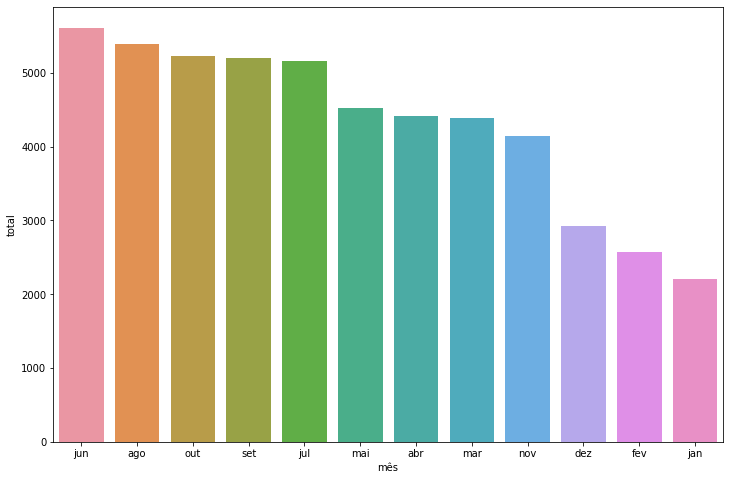

In [70]:
plt.figure(figsize=(12,8))
sns.barplot(x="mês", y="total", data = freq_sub_mes_was)

Text(0.5, 0, 'mes')

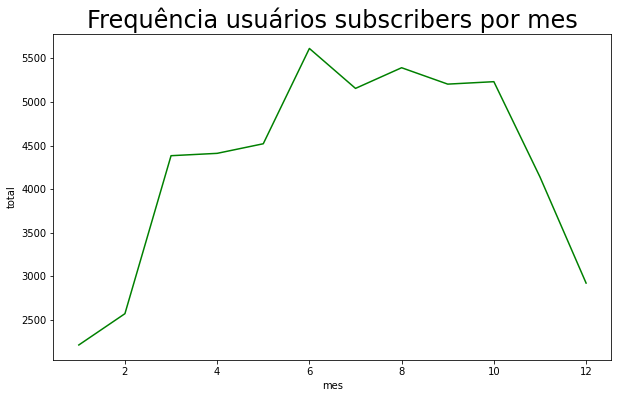

In [71]:
#GRAFICO DE LINHA
plt.figure(figsize=(10,6))
sns.lineplot(data = freq_sub_mes_was, x="ordem_mes_washington", y="total", color = "green")
plt.title( "Frequência usuários subscribers por mes" , size = 24 ) #Define o título do gráfico e define o tamanho
plt.xlabel( "mes" , size = 10 ) #Usa o plt para adicionar um rotulo no eixo x e define o tamanho

**Explorando de usuários Customer por mes**

In [72]:
filtro_cust_was = df_was2['tipo_usuario'] == "Customer" 

In [73]:
customer_was = df_was2[filtro_cust_was]
customer_was

,duracao,mes,hora,dia_semana,tipo_usuario
10,16.912317,mar,21,Thursday,Customer
12,102.999183,mar,21,Thursday,Customer
16,9.667250,mar,20,Thursday,Customer
25,12.898400,mar,19,Thursday,Customer
29,25.301633,mar,19,Thursday,Customer
...,...,...,...,...,...
66276,9.205000,out,13,Saturday,Customer
66305,216.092433,out,11,Saturday,Customer
66315,14.797083,out,9,Saturday,Customer
66319,20.423033,out,8,Saturday,Customer


In [74]:
customer_was.mes.value_counts()

jul    2186
ago    1806
jun    1707
set    1674
out    1560
mai    1248
abr    1192
mar    1188
nov    1075
dez     432
fev     283
jan     222
Name: mes, dtype: int64

In [75]:
freq_cust_mes_was = customer_was.mes.value_counts()

In [76]:
freq_cust_mes_was.to_frame() #Transforma uma serie em DataFrame

,mes
jul,2186
ago,1806
jun,1707
set,1674
out,1560
mai,1248
abr,1192
mar,1188
nov,1075
dez,432


In [77]:
freq_cust_mes_was.to_frame().reset_index() #reseta o index, adicionando mais uma coluna

,index,mes
0,jul,2186
1,ago,1806
2,jun,1707
3,set,1674
4,out,1560
5,mai,1248
6,abr,1192
7,mar,1188
8,nov,1075
9,dez,432


In [78]:
freq_cust_mes_was = freq_cust_mes_was.to_frame().reset_index()

In [79]:
freq_cust_mes_was.columns = ['mês', 'total']
freq_cust_mes_was

,mês,total
0,jul,2186
1,ago,1806
2,jun,1707
3,set,1674
4,out,1560
5,mai,1248
6,abr,1192
7,mar,1188
8,nov,1075
9,dez,432


In [80]:
ordem_mes_washington = [7, 8, 6, 9, 10, 5, 4, 3, 11, 12, 2, 1]
freq_cust_mes_was['ordem_mes_washington'] = ordem_mes_washington
print(freq_cust_mes_was)

    mês  total  ordem_mes_washington
0   jul   2186                     7
1   ago   1806                     8
2   jun   1707                     6
3   set   1674                     9
4   out   1560                    10
5   mai   1248                     5
6   abr   1192                     4
7   mar   1188                     3
8   nov   1075                    11
9   dez    432                    12
10  fev    283                     2
11  jan    222                     1


In [81]:
freq_cust_mes_was

,mês,total,ordem_mes_washington
0,jul,2186,7
1,ago,1806,8
2,jun,1707,6
3,set,1674,9
4,out,1560,10
5,mai,1248,5
6,abr,1192,4
7,mar,1188,3
8,nov,1075,11
9,dez,432,12


In [82]:
freq_cust_mes_was.sort_values(by=['ordem_mes_washington'])

,mês,total,ordem_mes_washington
11,jan,222,1
10,fev,283,2
7,mar,1188,3
6,abr,1192,4
5,mai,1248,5
2,jun,1707,6
0,jul,2186,7
1,ago,1806,8
3,set,1674,9
4,out,1560,10


**Frequencia de usuários "Customer" por mes**

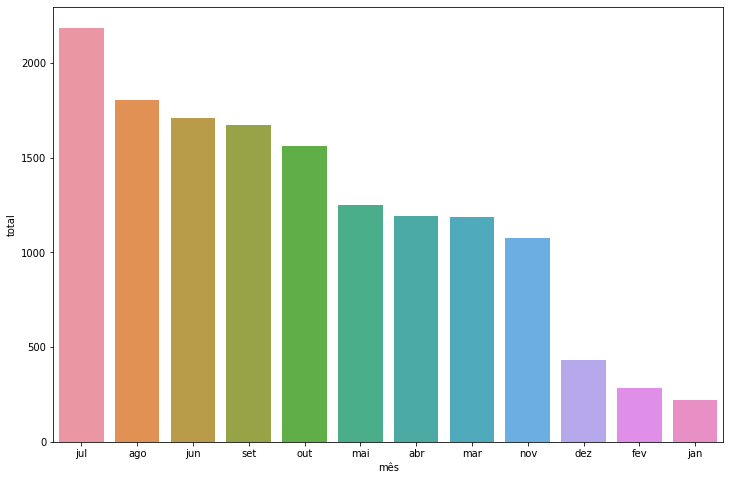

In [83]:
plt.figure(figsize=(12,8)) #Configura o tamanho da figura (12 para direita e 8 para baixo)
sns.barplot(x="mês", y="total", data = freq_cust_mes_was)

Text(0.5, 0, 'mes')

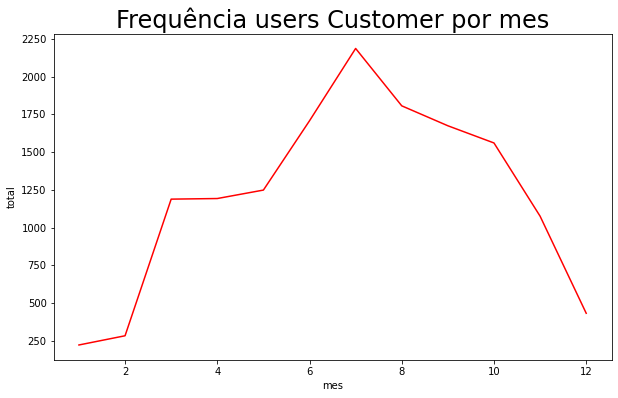

In [84]:
#GRAFICO DE LINHA
plt.figure(figsize=(10,6))
sns.lineplot(data = freq_cust_mes_was, x="ordem_mes_washington", y="total", color = "red")
plt.title( "Frequência users Customer por mes" , size = 24 ) #Define o título do gráfico e define o tamanho
plt.xlabel( "mes" , size = 10 ) #Usa o plt para adicionar um rotulo no eixo x e define o tamanho

**Explorando de usuários Subscriber (cadastrado) por hora**

In [85]:
subscriber_was.hora.value_counts()

17    6225
8     5256
18    5131
16    3730
7     3584
19    3380
9     2828
15    2547
12    2477
13    2395
20    2295
14    2219
11    1989
10    1713
21    1640
6     1276
22    1138
23     665
5      391
0      385
1      224
2      146
3       64
4       55
Name: hora, dtype: int64

In [86]:
freq_sub_hora_was = subscriber_was.hora.value_counts()

In [87]:
freq_sub_hora_was.to_frame() #Transforma uma serie em DataFrame
freq_sub_hora_was = freq_sub_hora_was.to_frame().reset_index()
freq_sub_hora_was.columns = ['hora', 'total']
freq_sub_hora_was

,hora,total
0,17,6225
1,8,5256
2,18,5131
3,16,3730
4,7,3584
5,19,3380
6,9,2828
7,15,2547
8,12,2477
9,13,2395


**Frequencia de usuários "Subscriber" por hora**

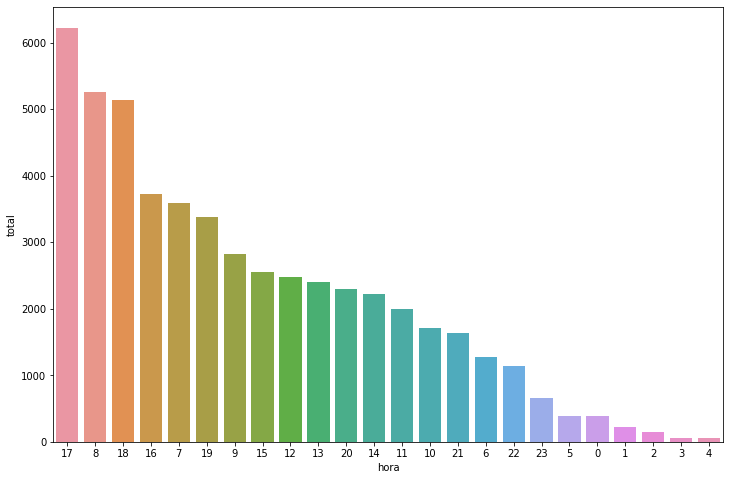

In [88]:
plt.figure(figsize=(12,8))
sns.barplot(x="hora", y="total", data = freq_sub_hora_was, order = subscriber_was['hora'].value_counts().index )

**Explorando de usuários Customer (visitantes) por hora**

In [89]:
customer_was.hora.value_counts()

14    1401
17    1375
16    1374
15    1282
13    1243
12    1190
11     995
18     980
10     895
19     808
20     616
9      547
21     432
8      359
22     321
7      195
23     193
0      130
1       75
6       71
2       38
3       25
5       16
4       12
Name: hora, dtype: int64

In [90]:
freq_cust_hora_was = customer_was.hora.value_counts()

In [91]:
freq_cust_hora_was.to_frame() #Transforma uma serie em DataFrame

freq_cust_hora_was = freq_cust_hora_was.to_frame().reset_index()

freq_cust_hora_was.columns = ['hora', 'total']
freq_cust_hora_was

,hora,total
0,14,1401
1,17,1375
2,16,1374
3,15,1282
4,13,1243
5,12,1190
6,11,995
7,18,980
8,10,895
9,19,808


**Frequencia de usuários "Customer" por hora**

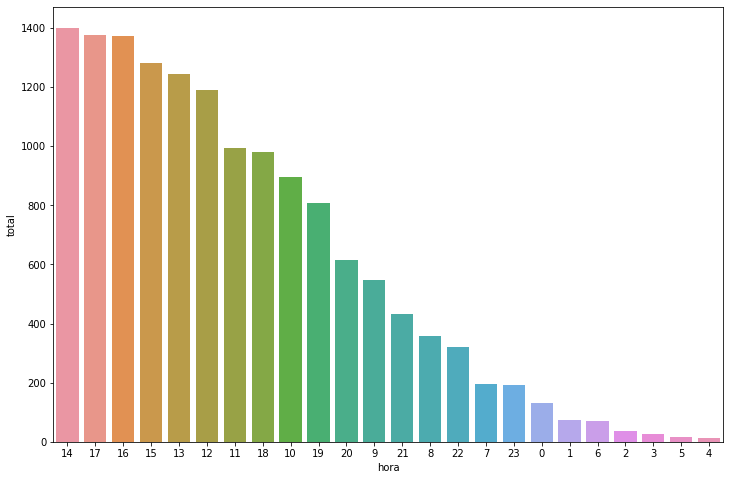

In [92]:
plt.figure(figsize=(12,8))
sns.barplot(x="hora", y="total", data = freq_cust_hora_was, order = customer_was['hora'].value_counts().index )

**Explorando de usuários (Subscriber) por dia da semana**

In [93]:
subscriber_was['dia_semana'].value_counts() #Utilizando o df subscriber_chicago que foi criado anteriormente

Wednesday    8520
Thursday     8454
Tuesday      8322
Friday       7958
Monday       7658
Saturday     5589
Sunday       5252
Name: dia_semana, dtype: int64

In [94]:
freq_sub_dia_was = subscriber_was['dia_semana'].value_counts()

In [95]:
freq_sub_dia_was

Wednesday    8520
Thursday     8454
Tuesday      8322
Friday       7958
Monday       7658
Saturday     5589
Sunday       5252
Name: dia_semana, dtype: int64

In [96]:
freq_sub_dia_was.to_frame().reset_index()

,index,dia_semana
0,Wednesday,8520
1,Thursday,8454
2,Tuesday,8322
3,Friday,7958
4,Monday,7658
5,Saturday,5589
6,Sunday,5252


In [97]:
freq_sub_dia_was = freq_sub_dia_was.to_frame().reset_index()

In [98]:
freq_sub_dia_was.columns = ["dia", "total"]

In [99]:
freq_sub_dia_was

,dia,total
0,Wednesday,8520
1,Thursday,8454
2,Tuesday,8322
3,Friday,7958
4,Monday,7658
5,Saturday,5589
6,Sunday,5252


**Frequencia de usuários (Subscriber) por dia da semana no ano**

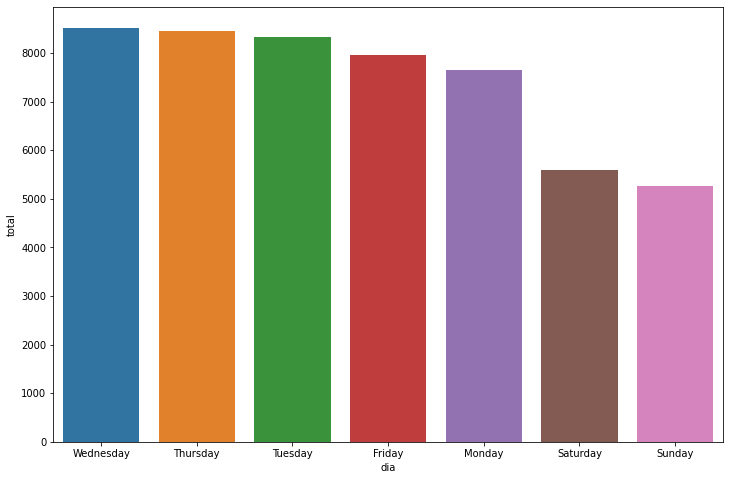

In [100]:
plt.figure(figsize=(12,8))
sns.barplot(x="dia", y="total", data = freq_sub_dia_was)

**Explorando usuários (Customer) por dia da semana**

In [101]:
customer_was['dia_semana'].value_counts() #Utilizando o df customer_chicago que foi criado anteriormente

Saturday     3311
Sunday       2975
Friday       2012
Monday       1736
Wednesday    1583
Thursday     1530
Tuesday      1426
Name: dia_semana, dtype: int64

In [102]:
freq_cust_dia_was = customer_was['dia_semana'].value_counts()

In [103]:
freq_cust_dia_was

Saturday     3311
Sunday       2975
Friday       2012
Monday       1736
Wednesday    1583
Thursday     1530
Tuesday      1426
Name: dia_semana, dtype: int64

In [104]:
freq_cust_dia_was.to_frame().reset_index()

,index,dia_semana
0,Saturday,3311
1,Sunday,2975
2,Friday,2012
3,Monday,1736
4,Wednesday,1583
5,Thursday,1530
6,Tuesday,1426


In [105]:
freq_cust_dia_was = freq_cust_dia_was.to_frame().reset_index()

In [106]:
freq_cust_dia_was

,index,dia_semana
0,Saturday,3311
1,Sunday,2975
2,Friday,2012
3,Monday,1736
4,Wednesday,1583
5,Thursday,1530
6,Tuesday,1426


In [107]:
freq_cust_dia_was.columns = ['dia', 'total']

In [108]:
freq_cust_dia_was

,dia,total
0,Saturday,3311
1,Sunday,2975
2,Friday,2012
3,Monday,1736
4,Wednesday,1583
5,Thursday,1530
6,Tuesday,1426


**Frequencia de usuários (Customer) por dia da semana no ano**

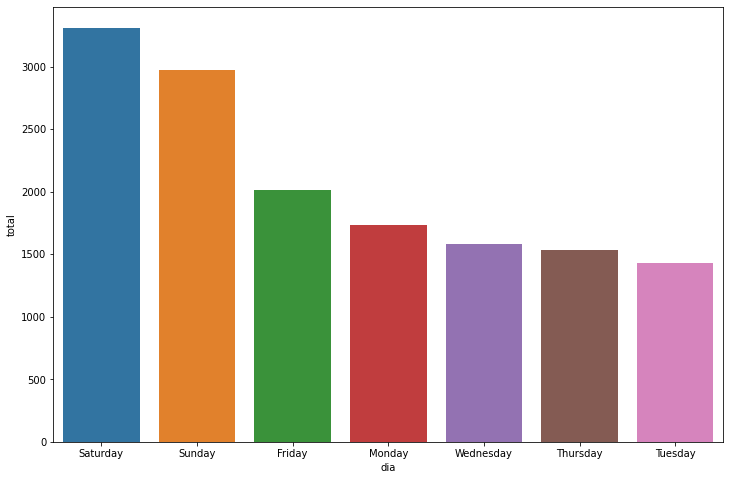

In [109]:
plt.figure(figsize=(12,8))
sns.barplot(x="dia", y="total", data = freq_cust_dia_was)

**Explorando os dias das semanas do primeiro trimestre (meses) de usuários Subscriber**

In [110]:
filtro_sub_jan_was = subscriber_was['mes'] == "jan"

In [111]:
filtro_sub_jan_was = subscriber_was[filtro_sub_jan_was]

In [112]:
filtro_sub_jan_was

,duracao,mes,hora,dia_semana,tipo_usuario
8425,5.674333,jan,23,Sunday,Subscriber
8426,15.558917,jan,23,Sunday,Subscriber
8427,8.356967,jan,20,Sunday,Subscriber
8428,11.574267,jan,20,Sunday,Subscriber
8429,7.082417,jan,20,Sunday,Subscriber
...,...,...,...,...,...
10854,7.493617,jan,1,Friday,Subscriber
10855,6.542750,jan,1,Friday,Subscriber
10856,4.563583,jan,1,Friday,Subscriber
10857,11.080450,jan,0,Friday,Subscriber


In [113]:
filtro_sub_jan_was.dia_semana.value_counts()

Thursday     408
Friday       375
Wednesday    312
Saturday     307
Tuesday      286
Sunday       264
Monday       260
Name: dia_semana, dtype: int64

In [114]:
filtro_sub_jan_was = filtro_sub_jan_was.dia_semana.value_counts().to_frame().reset_index()

In [115]:
filtro_sub_jan_was

,index,dia_semana
0,Thursday,408
1,Friday,375
2,Wednesday,312
3,Saturday,307
4,Tuesday,286
5,Sunday,264
6,Monday,260


In [116]:
filtro_sub_jan_was.columns = ['dia', 'total']

In [117]:
filtro_sub_jan_was

,dia,total
0,Thursday,408
1,Friday,375
2,Wednesday,312
3,Saturday,307
4,Tuesday,286
5,Sunday,264
6,Monday,260


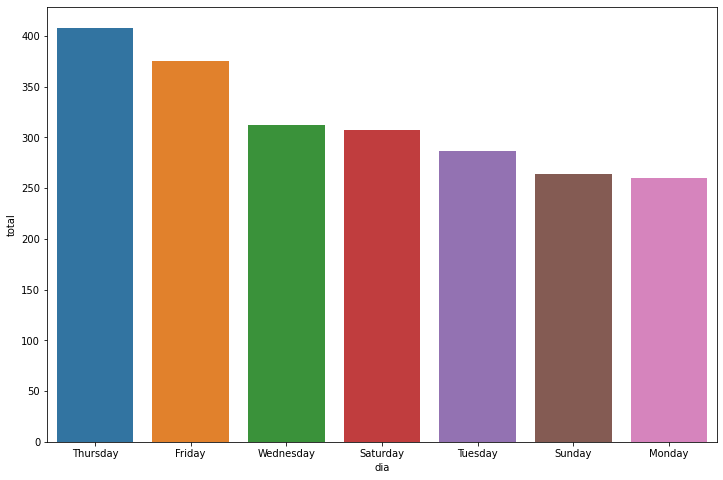

In [118]:
plt.figure(figsize=(12,8))
sns.barplot(x="dia", y="total", data = filtro_sub_jan_was)

**Fevereiro**

In [119]:
filtro_sub_fev_was = subscriber_was['mes'] == "fev"

In [120]:
filtro_sub_fev_was = subscriber_was[filtro_sub_fev_was]

In [121]:
filtro_sub_fev_was

,duracao,mes,hora,dia_semana,tipo_usuario
5571,7.514917,fev,23,Monday,Subscriber
5572,19.111333,fev,23,Monday,Subscriber
5573,1.299983,fev,22,Monday,Subscriber
5574,4.808983,fev,22,Monday,Subscriber
5575,17.798450,fev,22,Monday,Subscriber
...,...,...,...,...,...
8420,5.122833,fev,6,Monday,Subscriber
8421,12.389317,fev,6,Monday,Subscriber
8422,11.508233,fev,6,Monday,Subscriber
8423,7.440017,fev,5,Monday,Subscriber


In [122]:
filtro_sub_fev_was.dia_semana.value_counts()

Monday       470
Thursday     448
Friday       408
Wednesday    331
Saturday     310
Tuesday      309
Sunday       295
Name: dia_semana, dtype: int64

In [123]:
filtro_sub_fev_was = filtro_sub_fev_was.dia_semana.value_counts().to_frame().reset_index()

In [124]:
filtro_sub_fev_was

,index,dia_semana
0,Monday,470
1,Thursday,448
2,Friday,408
3,Wednesday,331
4,Saturday,310
5,Tuesday,309
6,Sunday,295


In [125]:
filtro_sub_fev_was.columns = ['dia','total']

In [126]:
filtro_sub_fev_was

,dia,total
0,Monday,470
1,Thursday,448
2,Friday,408
3,Wednesday,331
4,Saturday,310
5,Tuesday,309
6,Sunday,295


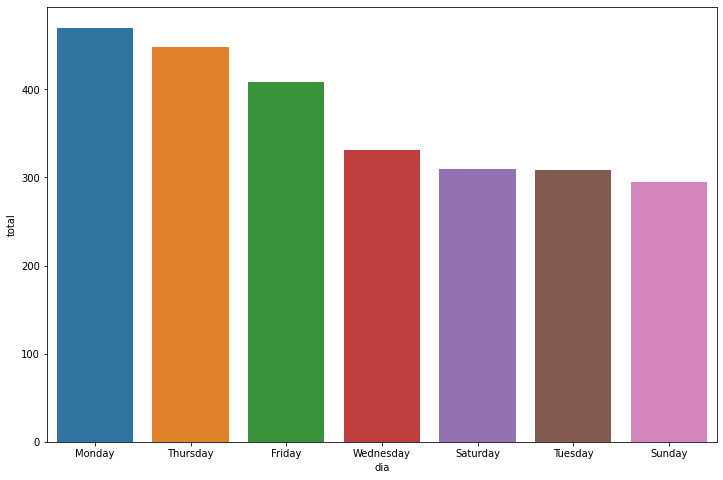

In [127]:
plt.figure(figsize=(12,8))
sns.barplot(x="dia", y="total", data = filtro_sub_fev_was)

**Março**

In [128]:
filtro_sub_mar_was = subscriber_was['mes'] == "mar"

In [129]:
filtro_sub_mar_was = subscriber_was[filtro_sub_mar_was]

In [130]:
filtro_sub_mar_was

,duracao,mes,hora,dia_semana,tipo_usuario
0,7.123117,mar,22,Thursday,Subscriber
1,9.792517,mar,22,Thursday,Subscriber
2,6.632983,mar,22,Thursday,Subscriber
3,7.404700,mar,22,Thursday,Subscriber
4,13.014583,mar,22,Thursday,Subscriber
...,...,...,...,...,...
5566,20.393917,mar,6,Tuesday,Subscriber
5567,6.902017,mar,6,Tuesday,Subscriber
5568,6.644233,mar,6,Tuesday,Subscriber
5569,3.598450,mar,6,Tuesday,Subscriber


In [131]:
filtro_sub_mar_was.dia_semana.value_counts()

Wednesday    841
Thursday     837
Tuesday      797
Friday       583
Monday       579
Saturday     428
Sunday       318
Name: dia_semana, dtype: int64

In [132]:
filtro_sub_mar_was = filtro_sub_mar_was.dia_semana.value_counts().to_frame().reset_index()

In [133]:
filtro_sub_mar_was

,index,dia_semana
0,Wednesday,841
1,Thursday,837
2,Tuesday,797
3,Friday,583
4,Monday,579
5,Saturday,428
6,Sunday,318


In [134]:
filtro_sub_mar_was.columns = ['dia', 'total']
filtro_sub_mar_was

,dia,total
0,Wednesday,841
1,Thursday,837
2,Tuesday,797
3,Friday,583
4,Monday,579
5,Saturday,428
6,Sunday,318


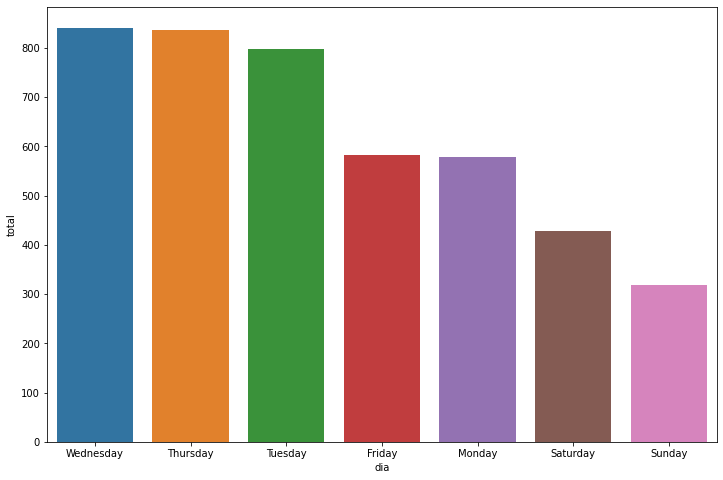

In [135]:
plt.figure(figsize=(12,8))
sns.barplot(x="dia", y="total", data = filtro_sub_mar_was)

**Explorando os dias das semanas do primeiro trimestre (meses) de usuários Customer**

**Janeiro**

Fevereiro

Março